In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tnrange
import scipy.stats
import pandas as pd
from scipy.stats import rankdata
import matplotlib as mpl
from weightedcorr import WeightedCorr
import itertools

In [2]:
rep_no = 5

C4_diff_all = np.zeros((rep_no, 2000,2000))
C4_nona_all = np.zeros((rep_no, 2000,2000))
C8_diff_all = np.zeros((rep_no, 2000,2000))
C8_nona_all = np.zeros((rep_no, 2000,2000))
C12_diff_all = np.zeros((rep_no, 2000,2000))
C12_nona_all = np.zeros((rep_no, 2000,2000))

C4_diff_scale_all = np.zeros((rep_no, 2000))
C4_nona_scale_all = np.zeros((rep_no, 2000))
C8_diff_scale_all = np.zeros((rep_no, 2000))
C8_nona_scale_all = np.zeros((rep_no, 2000))
C12_diff_scale_all = np.zeros((rep_no, 2000))
C12_nona_scale_all = np.zeros((rep_no, 2000))

C4_rand_all = np.zeros((rep_no, 2000, 2000))
C4_rand_scale_all = np.random.rand(rep_no, 2000)
C8_rand_all = np.zeros((rep_no, 2000, 2000))
C8_rand_scale_all = np.random.rand(rep_no, 2000)
C12_rand_all = np.zeros((rep_no, 2000, 2000))
C12_rand_scale_all = np.random.rand(rep_no, 2000)

for i in tnrange(rep_no):
    if i == 0:
        C4_dist_raw = np.load("/media/hdd01/sklee/CA1_clust4-60/data/clust4_syn_dist.npy")[:,-1]
        C8_dist_raw = np.load("/media/hdd01/sklee/CA1_clust8-30/data/clust8_syn_dist.npy")[:,-1]
        C12_dist_raw = np.load("/media/hdd01/sklee/CA1_clust12-20/data/clust12_syn_dist.npy")[:,-1]

        C4_diff_scale = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C4_nona_scale = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C8_diff_scale = np.load("/media/hdd01/sklee/CA1_clust8-30/clust/gru_s9_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C8_nona_scale = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/clust/gru_s9_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C12_diff_scale = np.load("/media/hdd01/sklee/CA1_clust12-20/clust/gru_s13_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C12_nona_scale = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/clust/gru_s13_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
    
    else:
        C4_dist_raw = np.load("/media/hdd01/sklee/CA1_clust4-60/data/clust4_syn_dist.npy")[:-1,-1]
        C8_dist_raw = np.load("/media/hdd01/sklee/CA1_clust8-30/data/clust8_syn_dist.npy")[:-1,-1]
        C12_dist_raw = np.load("/media/hdd01/sklee/CA1_clust12-20/data/clust12_syn_dist.npy")[:-1,-1]

        C4_diff_scale = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C4_nona_scale = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C8_diff_scale = np.load("/media/hdd01/sklee/CA1_clust8-30/clust/gru_s9_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C8_nona_scale = np.load("/media/hdd01/sklee/CA1_clust8-30_noNA/clust/gru_s9_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C12_diff_scale = np.load("/media/hdd01/sklee/CA1_clust12-20/clust/gru_s13_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C12_nona_scale = np.load("/media/hdd01/sklee/CA1_clust12-20_noNA/clust/gru_s13_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
    
    C4_diff_scale_all[i] = C4_diff_scale
    C4_nona_scale_all[i] = C4_nona_scale
    C8_diff_scale_all[i] = C8_diff_scale
    C8_nona_scale_all[i] = C8_nona_scale
    C12_diff_scale_all[i] = C12_diff_scale
    C12_nona_scale_all[i] = C12_nona_scale

/tmp/ipykernel_30462/569377441.py:24: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(rep_no):


  0%|          | 0/5 [00:00<?, ?it/s]

In [3]:
C4_dist = np.zeros((2000,2000))
C8_dist = np.zeros((2000,2000))
C12_dist = np.zeros((2000,2000))

for i in tnrange(2000):
    for j in range(2000):
        C4_dist[i,j] = np.abs(C4_dist_raw[i] - C4_dist_raw[j])
        C8_dist[i,j] = np.abs(C8_dist_raw[i] - C8_dist_raw[j])
        C12_dist[i,j] = np.abs(C12_dist_raw[i] - C12_dist_raw[j])
        
C4_unique = np.unique(C4_dist_raw)
C8_unique = np.unique(C8_dist_raw)
C12_unique = np.unique(C12_dist_raw)

/tmp/ipykernel_30462/3928889102.py:5: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(2000):


  0%|          | 0/2000 [00:00<?, ?it/s]

In [4]:
C4_diff_scale_mat_all = np.matmul(C4_diff_scale_all.reshape(rep_no,-1,1), C4_diff_scale_all.reshape(rep_no,1,-1))
C4_nona_scale_mat_all = np.matmul(C4_nona_scale_all.reshape(rep_no,-1,1), C4_nona_scale_all.reshape(rep_no,1,-1))
C8_diff_scale_mat_all = np.matmul(C8_diff_scale_all.reshape(rep_no,-1,1), C8_diff_scale_all.reshape(rep_no,1,-1))
C8_nona_scale_mat_all = np.matmul(C8_nona_scale_all.reshape(rep_no,-1,1), C8_nona_scale_all.reshape(rep_no,1,-1))
C12_diff_scale_mat_all = np.matmul(C12_diff_scale_all.reshape(rep_no,-1,1), C12_diff_scale_all.reshape(rep_no,1,-1))
C12_nona_scale_mat_all = np.matmul(C12_nona_scale_all.reshape(rep_no,-1,1), C12_nona_scale_all.reshape(rep_no,1,-1))
C4_rand_scale_mat_all = np.matmul(C4_rand_scale_all.reshape(rep_no,-1,1), C4_rand_scale_all.reshape(rep_no,1,-1))
C8_rand_scale_mat_all = np.matmul(C8_rand_scale_all.reshape(rep_no,-1,1), C8_rand_scale_all.reshape(rep_no,1,-1))
C12_rand_scale_mat_all = np.matmul(C12_rand_scale_all.reshape(rep_no,-1,1), C12_rand_scale_all.reshape(rep_no,1,-1))


In [9]:
x, y = np.triu_indices(2000, k=0)

grid_no = 16
thresh_no = 12
corr_type = "spearman"
grid_vals = np.empty((grid_no))
dist_unique = C12_unique
dist_raw = C12_dist_raw
dist = C12_dist
weights = C12_nona_scale_mat_all
grid_width = dist_unique.size // grid_no
for g in range(grid_no):
    grid_vals[g] = dist_unique[grid_width//2 + grid_width*g]

poss_choice = itertools.combinations(np.arange(grid_no), thresh_no)
poss_choice = list(poss_choice)
poss_choice = np.asarray(poss_choice)

corrs = np.empty((poss_choice.shape[0]))

for i in tnrange(poss_choice.shape[0]):
    choice = poss_choice[i]
    thresh = grid_vals[choice]
    #sub_raw = np.empty((2000))
    sub_proc = np.ones((2000,2000))
    
    for n in range(thresh_no+1):
        if n == 0:
            syn_idx = np.where(dist_raw < thresh[n])[0]
            #sub_raw[syn_idx] = n
            sub_proc[np.meshgrid(syn_idx, syn_idx)] = 0
        elif n == thresh_no:
            syn_idx = np.where(dist_raw >= thresh[n-1])[0]
            #sub_raw[syn_idx] = n
            sub_proc[np.meshgrid(syn_idx, syn_idx)] = 0
        else:
            syn_idx = np.where((dist_raw >= thresh[n-1]) & (dist_raw < thresh[n]))[0]
            #sub_raw[syn_idx] = n
            sub_proc[np.meshgrid(syn_idx, syn_idx)] = 0
            
    #for r in range(rep_no):
    corr = WeightedCorr(x=pd.Series(dist[x,y]),
                   y=pd.Series(sub_proc[x,y]),
                   w=pd.Series(weights[0][x,y]))(method=corr_type)
    corrs[i] = corr

/tmp/ipykernel_30462/2225894489.py:21: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(poss_choice.shape[0]):


  0%|          | 0/1820 [00:00<?, ?it/s]

/tmp/ipykernel_30462/2225894489.py:31: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  sub_proc[np.meshgrid(syn_idx, syn_idx)] = 0
/tmp/ipykernel_30462/2225894489.py:39: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  sub_proc[np.meshgrid(syn_idx, syn_idx)] = 0
/tmp/ipykernel_30462/2225894489.py:35: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an erro

In [ ]:
# C4 noNa
# [276.52453461 493.82127046 655.87144452 733.61829079]

# C4 Diff
# [276.52453461 493.82127046 655.87144452 733.61829079]
# 0.8052398081902775

# C8 NoNa
# [ 38.82286519 188.45162766 239.98441648 306.32355328 374.43015368
  # 464.68369799 648.73394184 744.41561658]
# 0.7139320669690151

# C8 Diff
# 
# 

0.5686416862043158


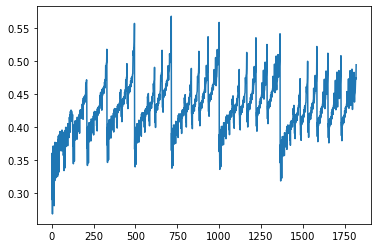

In [10]:
plt.plot(corrs)
print(np.max(corrs))

In [12]:
best_thresh = poss_choice[np.flip(np.argsort(corrs))[:10]]

print(grid_vals[best_thresh])

[[ 35.43181455  66.8284628   85.96031766 176.38208163 206.29095176
  255.43735371 308.21142371 364.87467551 434.69183171 574.74702929
  681.63407081 753.6972767 ]
 [ 35.43181455  66.8284628  159.82622347 176.38208163 206.29095176
  255.43735371 308.21142371 364.87467551 434.69183171 574.74702929
  681.63407081 753.6972767 ]
 [ 35.43181455  66.8284628   85.96031766 106.26734859 206.29095176
  255.43735371 308.21142371 364.87467551 434.69183171 574.74702929
  681.63407081 753.6972767 ]
 [ 35.43181455 141.24296597 159.82622347 176.38208163 206.29095176
  255.43735371 308.21142371 364.87467551 434.69183171 574.74702929
  681.63407081 753.6972767 ]
 [ 35.43181455  66.8284628  106.26734859 176.38208163 206.29095176
  255.43735371 308.21142371 364.87467551 434.69183171 574.74702929
  681.63407081 753.6972767 ]
 [ 35.43181455  85.96031766 106.26734859 176.38208163 206.29095176
  255.43735371 308.21142371 364.87467551 434.69183171 574.74702929
  681.63407081 753.6972767 ]
 [ 35.43181455  66.828